In [53]:
#from typing import Dict, Tuple, List
#from pathlib import Path
#
#import numpy as np
#import pandas as pd

#from numpy.testing import assert_equal, assert_allclose
from typing import Dict, Tuple, List
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy.testing import assert_equal, assert_allclose


In [54]:
#does intensity affect time to sleep and time slept?

In [55]:
#pd.read_csv("data/babynames/names2000_2021.csv", index_col=0)
minuteCaloriesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteSleep = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
sleepday = pd.read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
dailyCalories = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyActivity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

In [71]:
#does daily calories affect time required to fall asleep?
def merge_dailyCal_sleepDay(dailyCalories: pd.DataFrame, sleepday: pd.DataFrame):
    #copyOfSleepDay = 
    sleepday['SleepDay'] = pd.to_datetime(sleepday['SleepDay'])
    sleepday['Date'] = sleepday['SleepDay'].dt.strftime('%-m/%-d/%Y')
    df = pd.merge(sleepday,dailyCalories,left_on = ["Id","Date"],right_on = ["Id","ActivityDay"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

In [72]:
merge_dailyCal_sleepDay(dailyCalories, sleepday)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,ActivityDay,Calories,TimeToFallAsleep
0,1503960366,2016-04-12,1,327,346,4/12/2016,4/12/2016,1985,19
1,1503960366,2016-04-13,2,384,407,4/13/2016,4/13/2016,1797,23
2,1503960366,2016-04-15,1,412,442,4/15/2016,4/15/2016,1745,30
3,1503960366,2016-04-16,2,340,367,4/16/2016,4/16/2016,1863,27
4,1503960366,2016-04-17,1,700,712,4/17/2016,4/17/2016,1728,12
...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,4/30/2016,4/30/2016,2896,17
409,8792009665,2016-05-01,1,503,527,5/1/2016,5/1/2016,1962,24
410,8792009665,2016-05-02,1,415,423,5/2/2016,5/2/2016,2015,8
411,8792009665,2016-05-03,1,516,545,5/3/2016,5/3/2016,2297,29


In [73]:
def visualize_data(df):
    # Line plot of calories vs. time to fall asleep
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Calories', y='TimeToFallAsleep')
    plt.title('Daily Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Bar chart of calories vs. time to fall asleep
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Calories', y='TimeToFallAsleep')
    plt.title('Daily Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Scatter plot and regression line
    plt.figure(figsize=(12, 6))
    sns.regplot(data=df, x='Calories', y='TimeToFallAsleep', scatter_kws={'alpha':0.5})
    plt.title('Regression Analysis: Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Regression analysis
    X = df['Calories'].values.reshape(-1, 1)
    y = df['TimeToFallAsleep'].values
    regression = LinearRegression()
    regression.fit(X, y)
    y_pred = regression.predict(X)
    
    print('Regression Coefficient:', regression.coef_)
    print('Intercept:', regression.intercept_)
    print('R^2 score:', regression.score(X, y))


In [78]:
def plot_calorie_intervals(dailyCalories: pd.DataFrame):
    # Define the calorie intervals
    bins = [0, 1000, 2000, 3000, 4000, 5000]
    labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000']
    
    # Categorize the 'Calories' into intervals
    dailyCalories['CalorieInterval'] = pd.cut(dailyCalories['Calories'], bins=bins, labels=labels, right=False)
    
    # Create a bar chart of the frequency of each interval
    plt.figure(figsize=(10, 6))
    bar_plot = sns.countplot(data=dailyCalories, x='CalorieInterval')
    plt.title('Frequency of Daily Calories in Different Intervals')
    plt.xlabel('Calorie Interval')
    plt.ylabel('Frequency')

    # Add total frequency labels on top of each bar
    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.annotate(f'{height}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 5), 
                          textcoords = 'offset points')

    plt.show()

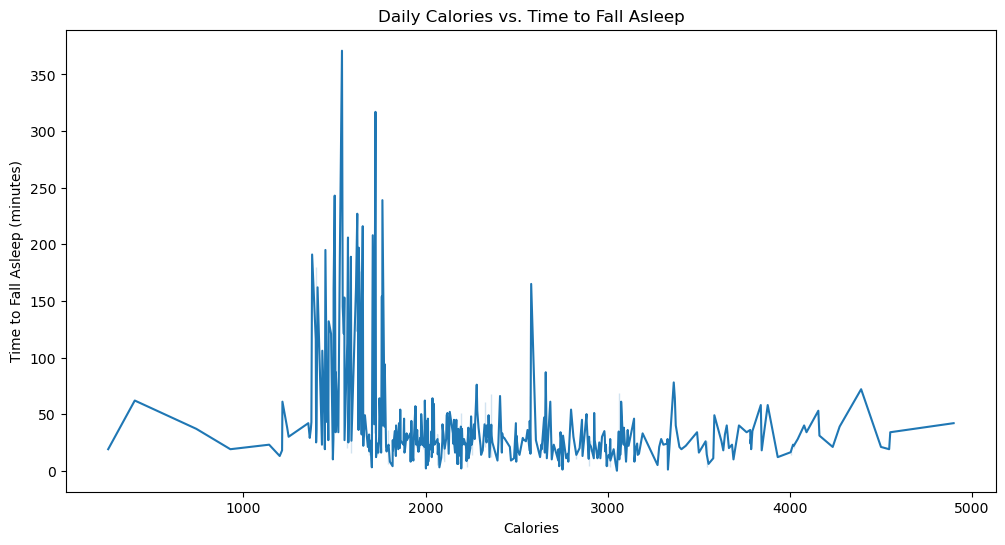

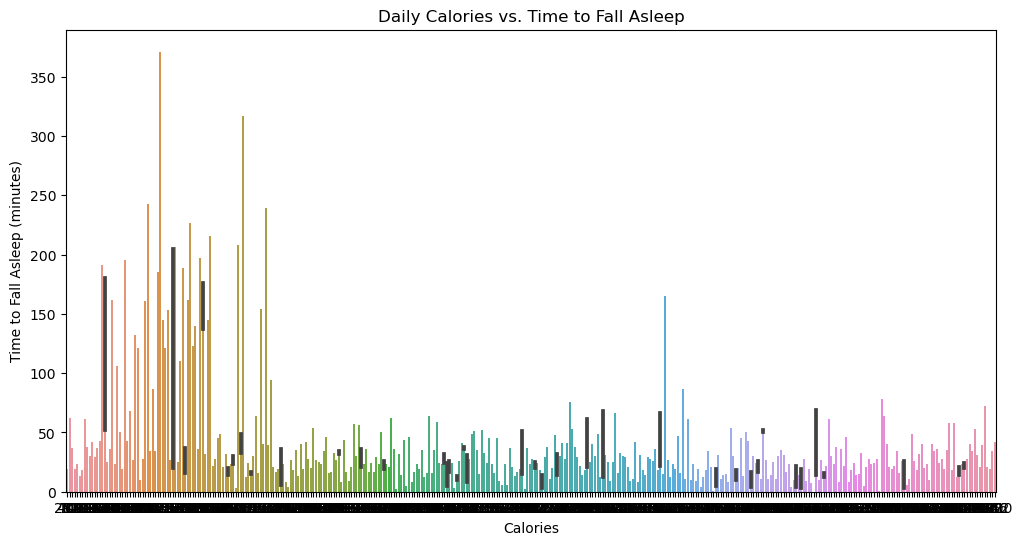

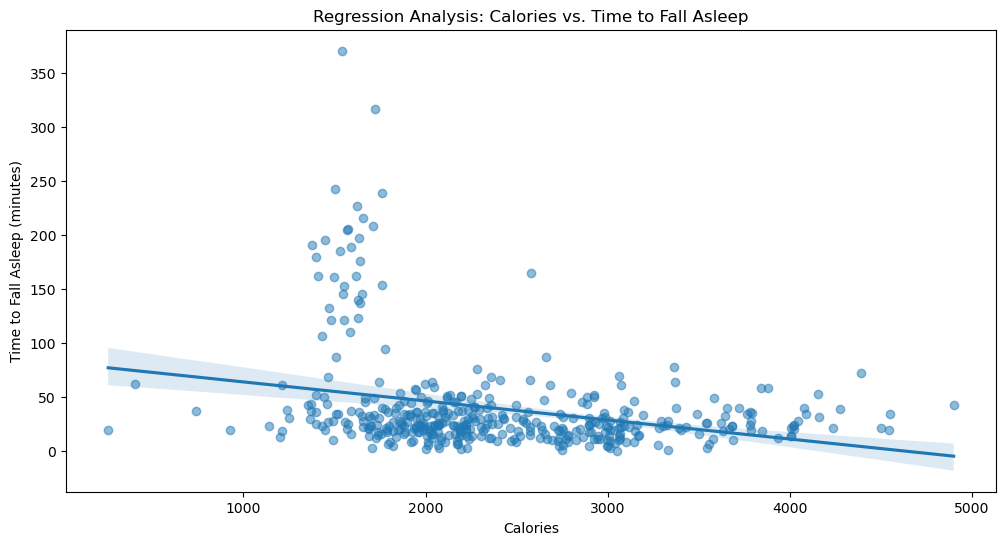

Regression Coefficient: [-0.01765138]
Intercept: 81.49240625201736
R^2 score: 0.08361089404548572


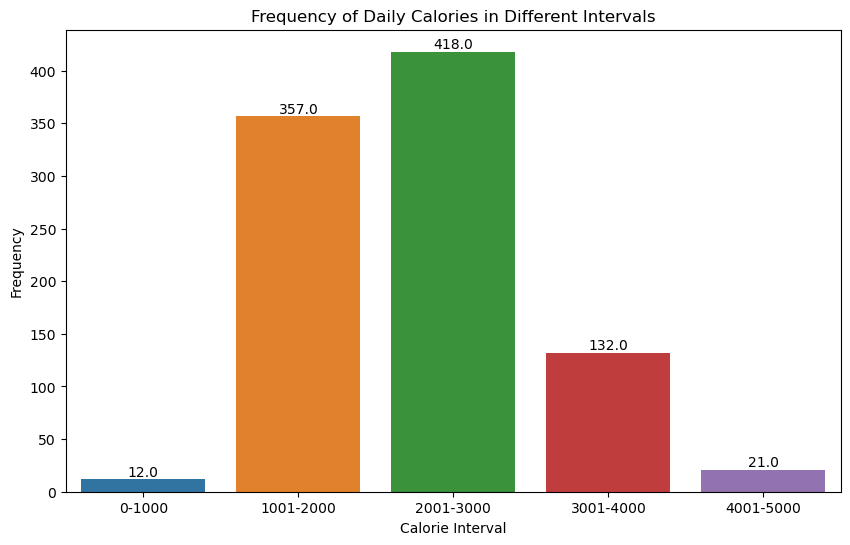

In [79]:
a = merge_dailyCal_sleepDay(dailyCalories, sleepday)
visualize_data(a)
plot_calorie_intervals(dailyCalories)